[1101.20229661 1072.24675402 1019.18391785 1060.25800709 1072.64967947
 1072.92436161 1091.40904269 1110.77909102 1113.90125851 1121.84537395
 1131.04286394 1128.81154756 1148.21589767 1163.81617863 1135.57757007
 1121.74410369 1087.60863398 1102.44306638 1113.5337571  1120.7908129
 1134.37284583 1149.16125206 1180.5445462  1185.07839868 1157.08831729
 1167.98091857 1169.83892457 1152.7462406  1118.13009206 1114.49416751
 1112.17615163 1069.55090714 1041.71350543 1072.48904654 1020.81198032] 0.9802067711309087 35


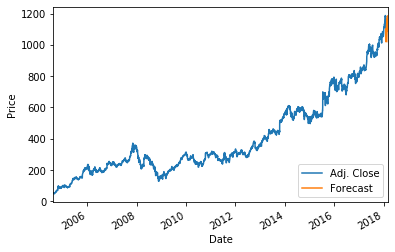

In [29]:
import pandas as pd
import quandl, datetime
import math
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = quandl.get('WIKI/GOOGL')
df = df[["Adj. Open", "Adj. High", "Adj. Low", "Adj. Close", "Adj. Volume"]]
df['HiLoPercent'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close']*100.0
df['Percent_change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Close']*100.0
df = df[['Adj. Close', "HiLoPercent", "Percent_change", "Adj. Volume"]]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)


X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace= True)

y = np.array(df['label'])

#y = preprocessing.scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.NaN for _ in range(len(df.columns) -1)] + [i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [32]:
import pickle 
with open("Stock_clf.pickle", "wb") as f:
    pickle.dump(clf, f)

cllf = pickle.load(open("Stock_clf.pickle", "rb"))
cllf.predict(X_lately)

array([1101.20229661, 1072.24675402, 1019.18391785, 1060.25800709,
       1072.64967947, 1072.92436161, 1091.40904269, 1110.77909102,
       1113.90125851, 1121.84537395, 1131.04286394, 1128.81154756,
       1148.21589767, 1163.81617863, 1135.57757007, 1121.74410369,
       1087.60863398, 1102.44306638, 1113.5337571 , 1120.7908129 ,
       1134.37284583, 1149.16125206, 1180.5445462 , 1185.07839868,
       1157.08831729, 1167.98091857, 1169.83892457, 1152.7462406 ,
       1118.13009206, 1114.49416751, 1112.17615163, 1069.55090714,
       1041.71350543, 1072.48904654, 1020.81198032])